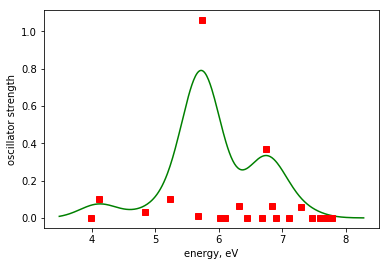

In [1]:
import os
from matplotlib import pyplot as mp
%matplotlib inline
import numpy as np

gaussian_exc_out = "acridone_CAM-B3LYPp2p_exc.out"
num_points = 350
sig = 0.3

spectrum = []
for line in open(gaussian_exc_out):
  if 'Excited State' in line:
    spectrum.append((float(line.split()[4]),float(line.split()[8][2:])))

(en_min, en_max) = (spectrum[0][0] - 0.5, spectrum[-1][0] + 0.5)
energy_ticks = np.linspace(en_min, en_max, num_points) 
  
def gaussian(x, osc_str, mu, sig):
  return (osc_str/(sig * np.sqrt(2 * np.pi))) * np.exp(-(x - mu)*(x - mu) / (2 * sig * sig))

norm_factor = 0
func_to_sum = []
for (mu, osc_str) in spectrum:
  func_to_sum.append(np.array(list(map(lambda x: gaussian(x, osc_str, mu, sig), energy_ticks))))  
  norm_factor += osc_str
spec_line_shape = np.cumsum(np.array(func_to_sum), axis = 0)[-1] / norm_factor

#the part below is needed only if the tabular representation of spectrum is required 
tot = np.around(list(zip(energy_ticks, spec_line_shape)), decimals=3)
with open(os.path.splitext(gaussian_exc_out)[0]+".sim" , "w+") as spec_cont:
  for i, d in enumerate(tot):
    line = ' '.join(str(x).rjust(8) for x in tot[i])+"\n"
    spec_cont.write(line)    

mp.xlabel('energy, eV')
mp.ylabel('oscillator strength')
mp.plot(energy_ticks, spec_line_shape, 'g', np.transpose(spectrum)[0], np.transpose(spectrum)[1], 'rs')
mp.show()

